<a href="https://colab.research.google.com/github/nihalnadaf/COVI_PRO/blob/main/COVID19_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [19]:
# Libraries used for Encoding
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import classification_report,confusion_matrix,r2_score, accuracy_score,precision_score,recall_score,f1_score,log_loss

#Hyperparametric Tuning
from sklearn.model_selection import GridSearchCV

In [20]:
import warnings
warnings.filterwarnings("ignore") # to ignoring wranings

In [21]:
# To load the data (.csv file)
covid_raw = pd.read_csv('sample_data/corona_tested_006.csv')

In [22]:
# creating a copy of read file
covid = covid_raw.copy()

**Exploratory Data Analysis- EDA**

In [23]:
covid_raw.shape

(241491, 11)

In [24]:
covid_raw.head().T

,0,1,2,3,4
Ind_ID,1,2,3,4,5
Test_date,11-03-2020,11-03-2020,11-03-2020,11-03-2020,11-03-2020
Cough_symptoms,True,False,False,True,True
Fever,False,True,True,False,False
Sore_throat,True,False,False,False,False
Shortness_of_breath,False,False,False,False,False
Headache,False,False,False,False,False
Corona,negative,positive,positive,negative,negative
Age_60_above,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN


In [25]:
covid_raw.tail().T

,241486,241487,241488,241489,241490
Ind_ID,241487,241488,241489,241490,241
Test_date,24-04-2020,24-04-2020,24-04-2020,24-04-2020,NaN
Cough_symptoms,False,False,False,False,NaN
Fever,False,False,False,False,NaN
Sore_throat,False,False,False,False,NaN
Shortness_of_breath,False,False,False,False,NaN
Headache,False,False,False,False,NaN
Corona,negative,negative,negative,negative,NaN
Age_60_above,NaN,NaN,NaN,NaN,NaN
Sex,male,female,female,female,NaN


In [26]:
covid_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241491 entries, 0 to 241490
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               241491 non-null  int64 
 1   Test_date            241490 non-null  object
 2   Cough_symptoms       241238 non-null  object
 3   Fever                241238 non-null  object
 4   Sore_throat          241489 non-null  object
 5   Shortness_of_breath  241489 non-null  object
 6   Headache             241489 non-null  object
 7   Corona               241490 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  222366 non-null  object
 10  Known_contact        241490 non-null  object
dtypes: int64(1), object(10)
memory usage: 20.3+ MB


In [27]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [28]:
covid.describe(include = 'all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,241491.000000,241490,241238,241238,241489,241489,241489,241490,151528,222366,241490
unique,NaN,45,2,2,2,2,2,3,2,2,3
top,NaN,20-04-2020,False,False,False,False,False,negative,No,female,Other
freq,NaN,10921,201909,221053,239565,239916,239078,223820,125703,111678,207527
mean,120745.000998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,69712.589539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,60372.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,120745.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,181117.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking unique values


In [29]:
covid.nunique()

,0
Ind_ID,241490
Test_date,45
Cough_symptoms,2
Fever,2
Sore_throat,2
Shortness_of_breath,2
Headache,2
Corona,3
Age_60_above,2
Sex,2


In [30]:
for column in covid:
    unique_value=covid[column].unique()
    print(f'unique Value in {column}:',unique_value)

unique Value in Ind_ID: [     1      2      3 ... 241488 241489 241490]
unique Value in Test_date: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020' nan]
unique Value in Cough_symptoms: [True False nan]
unique Value in Fever: [False True nan]
unique Value in Sore_throat: [True False nan]
unique Value in Shortness_of_breath: [False True nan]
unique Value in Headache: [False True nan]
unique Value in Corona: ['negative' 'positive' 'other' nan]
unique Val

# Analyzing amount of missing values

In [31]:
# create a table now
missing_values=covid.isnull().sum() # missing values

percent_missing = covid.isnull().sum()/covid.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Ind_ID,0,0.000000
Test_date,1,0.000414
Cough_symptoms,253,0.104766
Fever,253,0.104766
Sore_throat,2,0.000828
Shortness_of_breath,2,0.000828
Headache,2,0.000828
Corona,1,0.000414
Age_60_above,89963,37.253148
Sex,19125,7.919550


# null values.

In [32]:
covid.isnull()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
241486,False,False,False,False,False,False,False,False,True,False,False
241487,False,False,False,False,False,False,False,False,True,False,False
241488,False,False,False,False,False,False,False,False,True,False,False
241489,False,False,False,False,False,False,False,False,True,False,False


# Correlation between features and target variable

<Axes: >

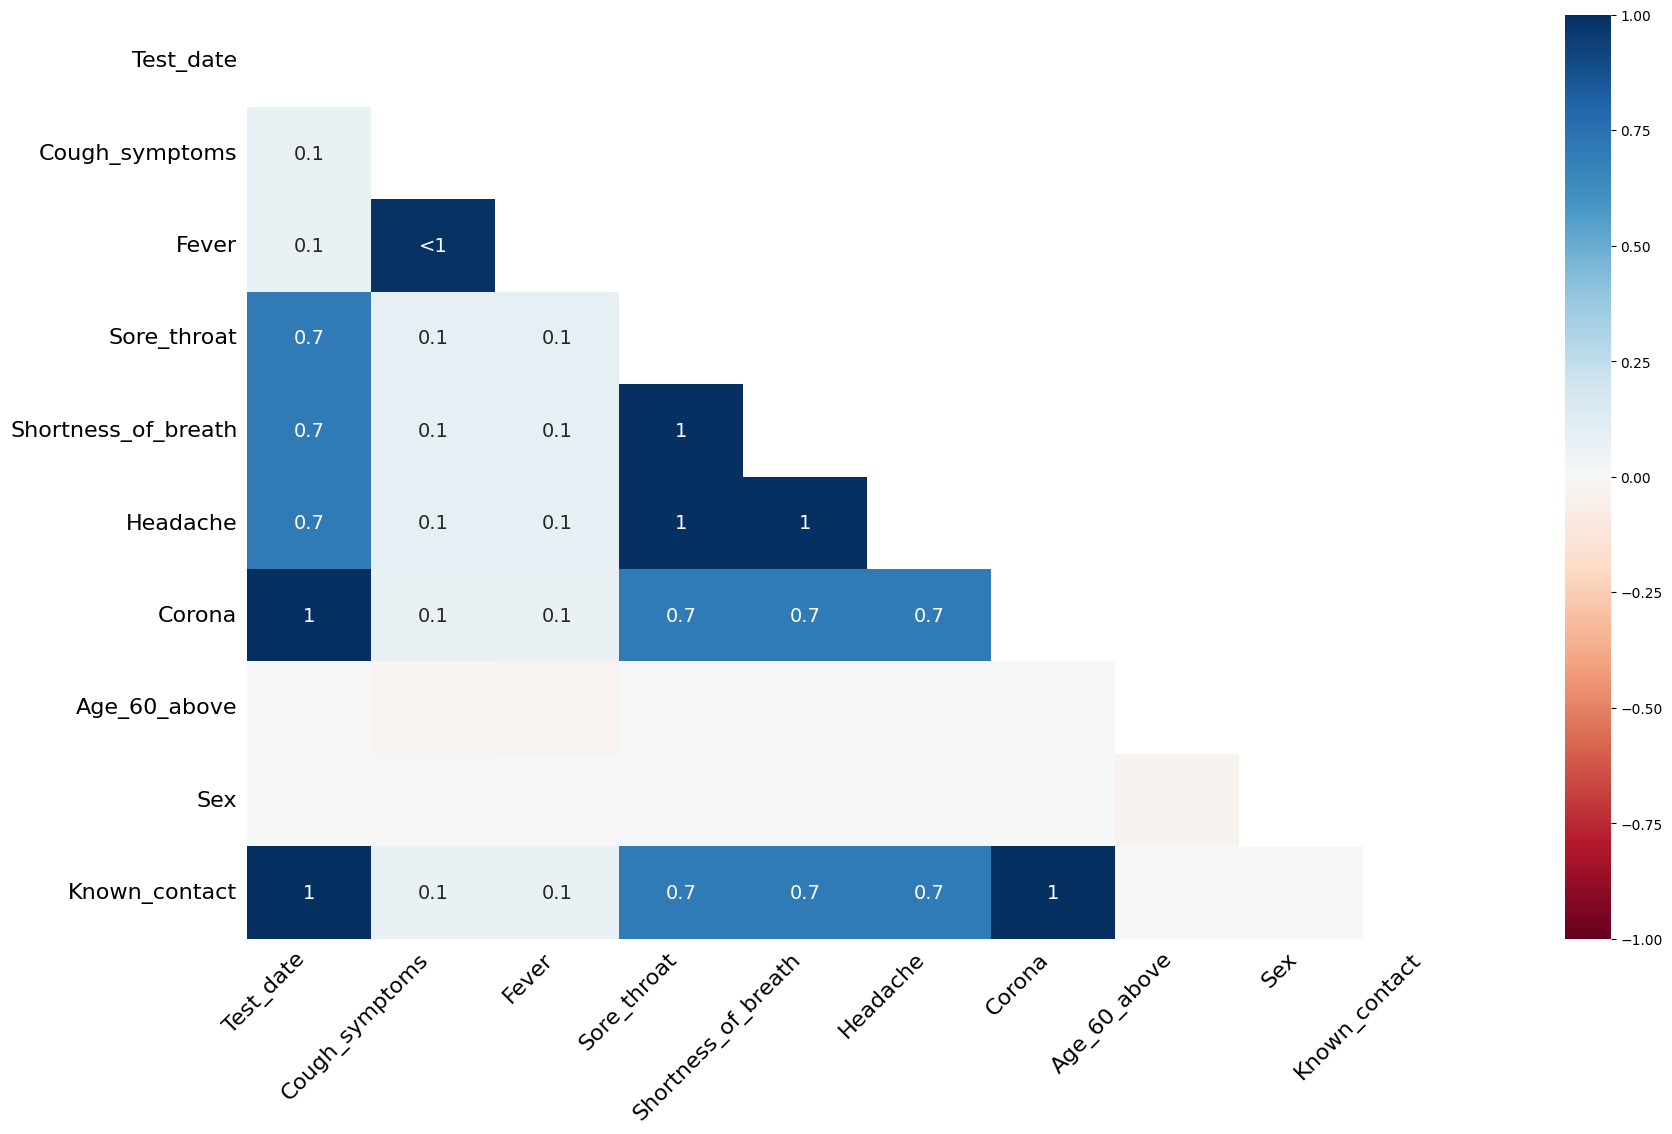

In [33]:
msno.heatmap(covid)

In [34]:
covid.drop_duplicates()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
241486,241487,24-04-2020,False,False,False,False,False,negative,NaN,male,Other
241487,241488,24-04-2020,False,False,False,False,False,negative,NaN,female,Other
241488,241489,24-04-2020,False,False,False,False,False,negative,NaN,female,Other
241489,241490,24-04-2020,False,False,False,False,False,negative,NaN,female,Other


In [35]:
covid[covid.duplicated()]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


# Imputation Values

In [36]:
# Converting null values of Sex column to others
value = 'other'
covid['Sex'].fillna(value,inplace=True)
covid

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,other,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,other,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,other,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,other,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,other,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
241486,241487,24-04-2020,False,False,False,False,False,negative,NaN,male,Other
241487,241488,24-04-2020,False,False,False,False,False,negative,NaN,female,Other
241488,241489,24-04-2020,False,False,False,False,False,negative,NaN,female,Other
241489,241490,24-04-2020,False,False,False,False,False,negative,NaN,female,Other


In [37]:
gender=covid['Sex'].unique()
gender

array(['other', 'male', 'female'], dtype=object)

In [38]:
# Date&Time Formatting
covid['Test_date']=pd.to_datetime(covid['Test_date'], format='%d-%m-%Y')

In [39]:
#percentage of missing values
covid.isnull().sum()/len(covid)

,0
Ind_ID,0.000000
Test_date,0.000004
Cough_symptoms,0.001048
Fever,0.001048
Sore_throat,0.000008
Shortness_of_breath,0.000008
Headache,0.000008
Corona,0.000004
Age_60_above,0.372531
Sex,0.000000


In [40]:
columns_to_replace = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']

covid[columns_to_replace]=covid[columns_to_replace].replace({True: 'TRUE',False: 'FALSE', 'nan': np.nan})

In [41]:
for column in covid:
    unique_value=covid[column].unique()
    print(f'unique Value in {column}:',unique_value)

unique Value in Ind_ID: [     1      2      3 ... 241488 241489 241490]
unique Value in Test_date: <DatetimeArray>
['2020-03-11 00:00:00', '2020-03-12 00:00:00', '2020-03-13 00:00:00',
 '2020-03-14 00:00:00', '2020-03-15 00:00:00', '2020-03-16 00:00:00',
 '2020-03-17 00:00:00', '2020-03-18 00:00:00', '2020-03-19 00:00:00',
 '2020-03-20 00:00:00', '2020-03-21 00:00:00', '2020-03-22 00:00:00',
 '2020-03-23 00:00:00', '2020-03-24 00:00:00', '2020-03-25 00:00:00',
 '2020-03-26 00:00:00', '2020-03-27 00:00:00', '2020-03-28 00:00:00',
 '2020-03-29 00:00:00', '2020-03-30 00:00:00', '2020-03-31 00:00:00',
 '2020-04-01 00:00:00', '2020-04-02 00:00:00', '2020-04-03 00:00:00',
 '2020-04-04 00:00:00', '2020-04-05 00:00:00', '2020-04-06 00:00:00',
 '2020-04-07 00:00:00', '2020-04-08 00:00:00', '2020-04-09 00:00:00',
 '2020-04-10 00:00:00', '2020-04-11 00:00:00', '2020-04-12 00:00:00',
 '2020-04-13 00:00:00', '2020-04-14 00:00:00', '2020-04-15 00:00:00',
 '2020-04-16 00:00:00', '2020-04-17 00:00:00'

In [42]:
gender=covid['Sex'].unique()
gender

array(['other', 'male', 'female'], dtype=object)

In [43]:
#percent of missing values
covid.isnull().sum()

,0
Ind_ID,0
Test_date,1
Cough_symptoms,253
Fever,253
Sore_throat,2
Shortness_of_breath,2
Headache,2
Corona,1
Age_60_above,89963
Sex,0


In [44]:
#now drop the null values
covid = covid.dropna(subset=['Age_60_above','Cough_symptoms','Fever'])

In [45]:
# after dropping check it
covid.isnull().sum()

,0
Ind_ID,0
Test_date,0
Cough_symptoms,0
Fever,0
Sore_throat,0
Shortness_of_breath,0
Headache,0
Corona,0
Age_60_above,0
Sex,0


In [46]:
covid

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
4512,4513,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,other,Other
4513,4514,2020-03-17,FALSE,FALSE,FALSE,TRUE,FALSE,negative,No,other,Abroad
4514,4515,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,Yes,other,Other
4515,4516,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,positive,No,other,Other
4516,4517,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,other,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,2020-04-14,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Yes,male,Abroad
156036,156037,2020-04-14,TRUE,FALSE,TRUE,TRUE,FALSE,negative,No,male,Abroad
156037,156038,2020-04-14,TRUE,TRUE,FALSE,FALSE,FALSE,negative,No,female,Abroad
156038,156039,2020-04-14,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other


In [47]:
covid.nunique()

,0
Ind_ID,151279
Test_date,29
Cough_symptoms,2
Fever,2
Sore_throat,2
Shortness_of_breath,2
Headache,2
Corona,3
Age_60_above,2
Sex,3


# After Cleaning

In [48]:
covid['Corona'].value_counts()

,count
Corona,
negative,137606
positive,11437
other,2236


In [49]:
covid['Sex'].value_counts()
#to find count of total males and females

,count
Sex,
male,70101
female,68071
other,13107


In [50]:
covid['Fever'].value_counts()

,count
Fever,
FALSE,137538
TRUE,13741


In [51]:
covid['Cough_symptoms'].value_counts()

,count
Cough_symptoms,
FALSE,124706
TRUE,26573


In [52]:
import matplotlib.pyplot as plt

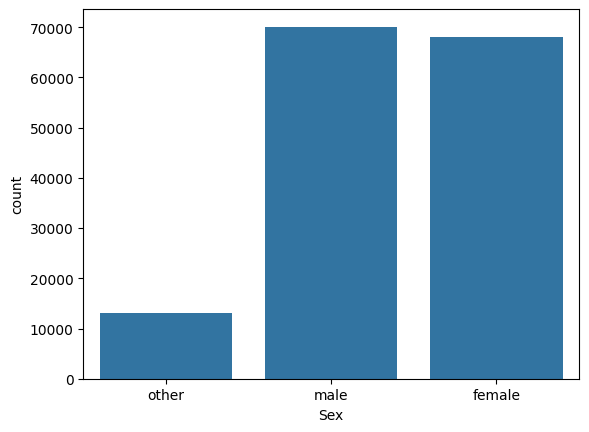

In [53]:
sns.countplot(x='Sex', data=covid)
plt.show()

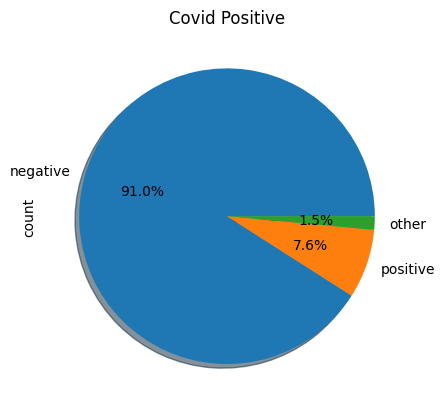

In [54]:
covid["Corona"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

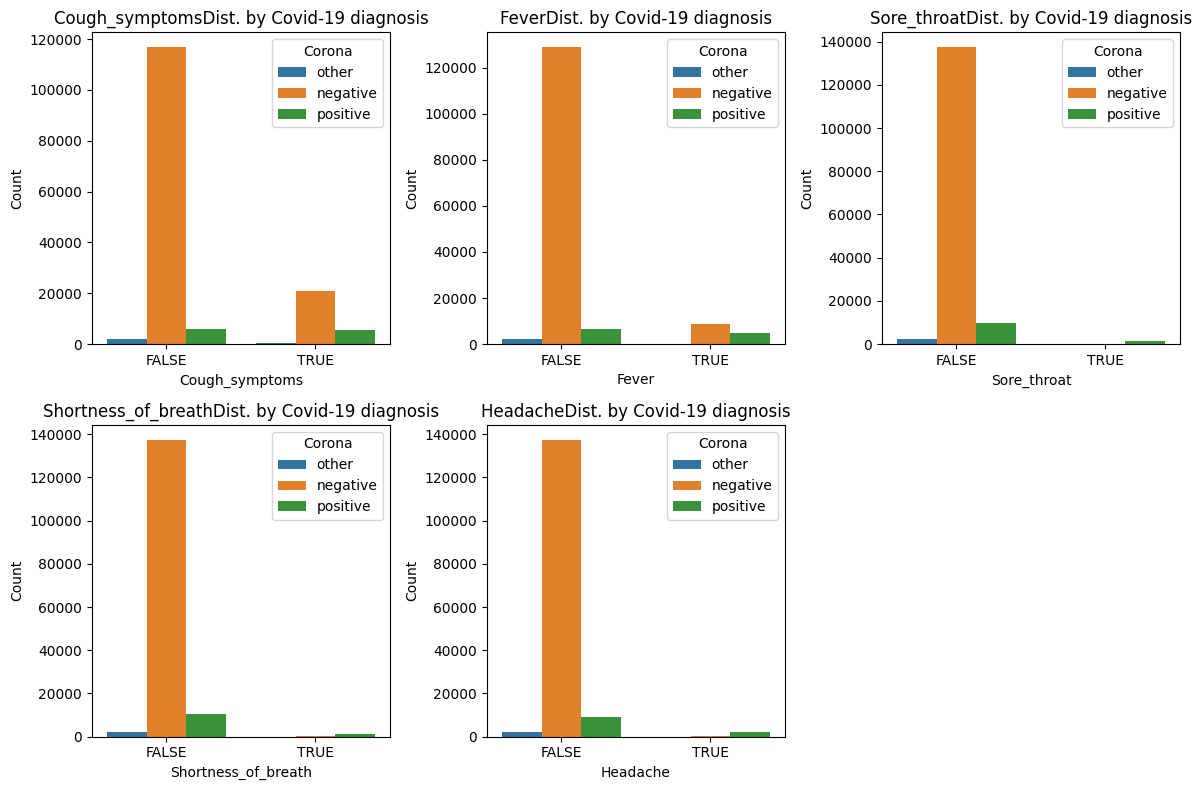

In [55]:
#Symptoms Distribution Visualisation
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache']
plt.figure(figsize=(12,8))
for i, symptom in enumerate(symptoms):
    plt.subplot(2,3,i+1)
    sns.countplot(x=symptom,data = covid, hue='Corona')
    plt.title(f'{symptom}Dist. by Covid-19 diagnosis')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


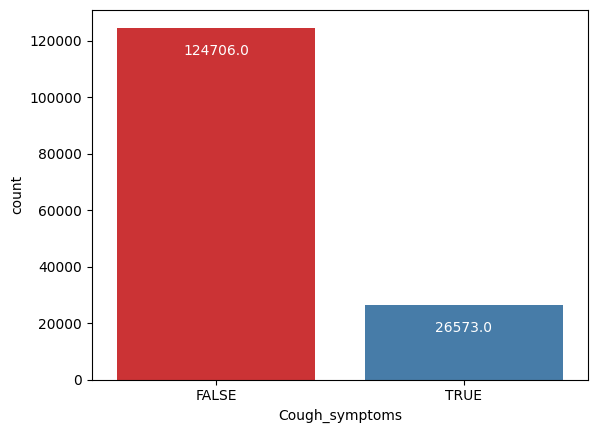

In [56]:
ax = sns.countplot(x='Cough_symptoms',data=covid, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

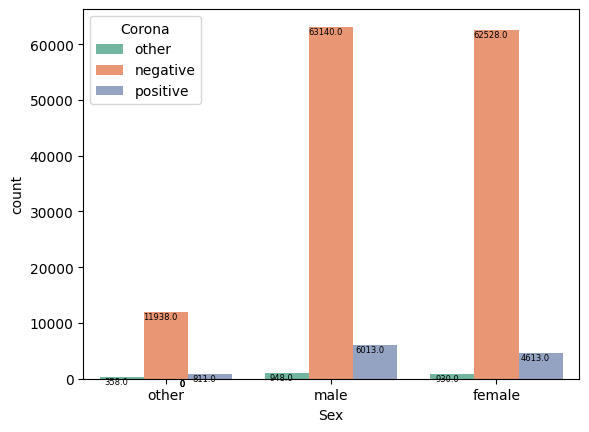

In [57]:
ax = sns.countplot(x='Sex',hue='Corona',data=covid, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+100), ha='center', va='center', color='black', size=6)
plt.show()

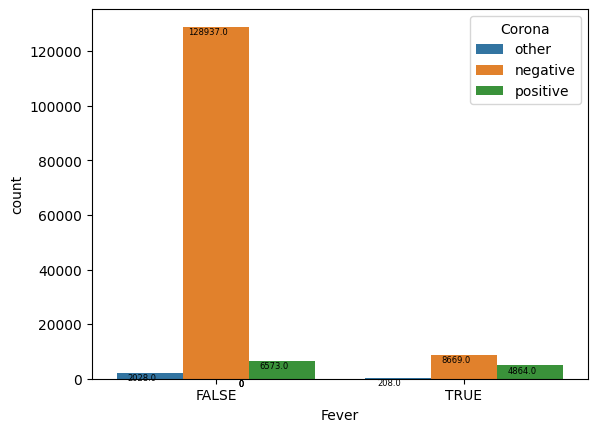

In [58]:
ax = sns.countplot(x='Fever',hue='Corona',data=covid)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+100), ha='center', va='center', color='Black', size=6)
plt.show()

# Feature Engineering
## Data Splitting

In [59]:
df_train_val= covid.query("Test_date <= '2020-04-15' and Test_date >= '2020-03-11'")
df_test = covid.query("Test_date <= '2020-04-30' and Test_date >= '2020-03-16'")
df_train_val

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
4512,4513,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,other,Other
4513,4514,2020-03-17,FALSE,FALSE,FALSE,TRUE,FALSE,negative,No,other,Abroad
4514,4515,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,Yes,other,Other
4515,4516,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,positive,No,other,Other
4516,4517,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,other,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,2020-04-14,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Yes,male,Abroad
156036,156037,2020-04-14,TRUE,FALSE,TRUE,TRUE,FALSE,negative,No,male,Abroad
156037,156038,2020-04-14,TRUE,TRUE,FALSE,FALSE,FALSE,negative,No,female,Abroad
156038,156039,2020-04-14,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other


In [60]:
#Dropping few unnecessary columns:

df_train_val= df_train_val.drop(columns=['Test_date','Ind_ID','Age_60_above','Sex'])
df_test= df_test.drop(columns=['Test_date','Ind_ID','Age_60_above','Sex'])

In [61]:
df_train_val.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
4512,FALSE,FALSE,FALSE,FALSE,FALSE,other,Other
4513,FALSE,FALSE,FALSE,TRUE,FALSE,negative,Abroad
4514,FALSE,FALSE,FALSE,FALSE,FALSE,other,Other
4515,FALSE,FALSE,FALSE,FALSE,FALSE,positive,Other
4516,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other


In [62]:
df_test.tail()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
156035,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Abroad
156036,TRUE,FALSE,TRUE,TRUE,FALSE,negative,Abroad
156037,TRUE,TRUE,FALSE,FALSE,FALSE,negative,Abroad
156038,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other
156039,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other


# Label Encoding

## Now let's encode the training data

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
Le=LabelEncoder()

In [65]:
df_train_val['Cough_symptoms']=Le.fit_transform(df_train_val['Cough_symptoms'])
df_train_val['Fever']=Le.fit_transform(df_train_val['Fever'])
df_train_val['Sore_throat']=Le.fit_transform(df_train_val['Sore_throat'])
df_train_val['Shortness_of_breath']=Le.fit_transform(df_train_val['Shortness_of_breath'])
df_train_val['Corona']=Le.fit_transform(df_train_val['Corona'])
df_train_val['Headache']=Le.fit_transform(df_train_val['Headache'])
df_train_val['Known_contact']=Le.fit_transform(df_train_val['Known_contact'])

In [66]:
df_train_val.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
4512,0,0,0,0,0,1,2
4513,0,0,0,1,0,0,0
4514,0,0,0,0,0,1,2
4515,0,0,0,0,0,2,2
4516,0,0,0,0,0,0,2


# Encoding the test data now

In [67]:
df_test['Cough_symptoms']=Le.fit_transform(df_test['Cough_symptoms'])
df_test['Fever']=Le.fit_transform(df_test['Fever'])
df_test['Sore_throat']=Le.fit_transform(df_test['Sore_throat'])
df_test['Shortness_of_breath']=Le.fit_transform(df_test['Shortness_of_breath'])
df_test['Corona']=Le.fit_transform(df_test['Corona'])
df_test['Headache']=Le.fit_transform(df_test['Headache'])
df_test['Known_contact']=Le.fit_transform(df_test['Known_contact'])

In [68]:
df_test.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
4512,0,0,0,0,0,1,2
4513,0,0,0,1,0,0,0
4514,0,0,0,0,0,1,2
4515,0,0,0,0,0,2,2
4516,0,0,0,0,0,0,2


Scaling


In [69]:
# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler = StandardScaler()
model = scaler.fit(df_train_val)
scaled_data = model.transform(df_train_val)

# print scaled data
print(scaled_data)

[[-0.4616115  -0.31608058 -0.10497865 ... -0.12425143  1.54969546
   0.41169677]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143 -0.30841849
  -2.75138479]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143  1.54969546
   0.41169677]
 ...
 [ 2.16632385  3.16375018 -0.10497865 ... -0.12425143 -0.30841849
  -2.75138479]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143 -0.30841849
   0.41169677]
 [-0.4616115  -0.31608058 -0.10497865 ... -0.12425143 -0.30841849
   0.41169677]]


In [70]:
covid

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
4512,4513,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,other,Other
4513,4514,2020-03-17,FALSE,FALSE,FALSE,TRUE,FALSE,negative,No,other,Abroad
4514,4515,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,other,Yes,other,Other
4515,4516,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,positive,No,other,Other
4516,4517,2020-03-17,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,other,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,2020-04-14,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Yes,male,Abroad
156036,156037,2020-04-14,TRUE,FALSE,TRUE,TRUE,FALSE,negative,No,male,Abroad
156037,156038,2020-04-14,TRUE,TRUE,FALSE,FALSE,FALSE,negative,No,female,Abroad
156038,156039,2020-04-14,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other


Feature Selection - Using Chi-Square Test


In [71]:
#Libraries for chi test
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [72]:
X=df_train_val.drop(['Corona'],axis=1)
y = df_train_val['Corona']
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X,y)
p_values = selector.pvalues_
p_values_df = pd.DataFrame({'Feature': X.columns, 'P_values':p_values})
print(p_values_df)

               Feature  P_values
0       Cough_symptoms       0.0
1                Fever       0.0
2          Sore_throat       0.0
3  Shortness_of_breath       0.0
4             Headache       0.0
5        Known_contact       0.0


<Axes: >

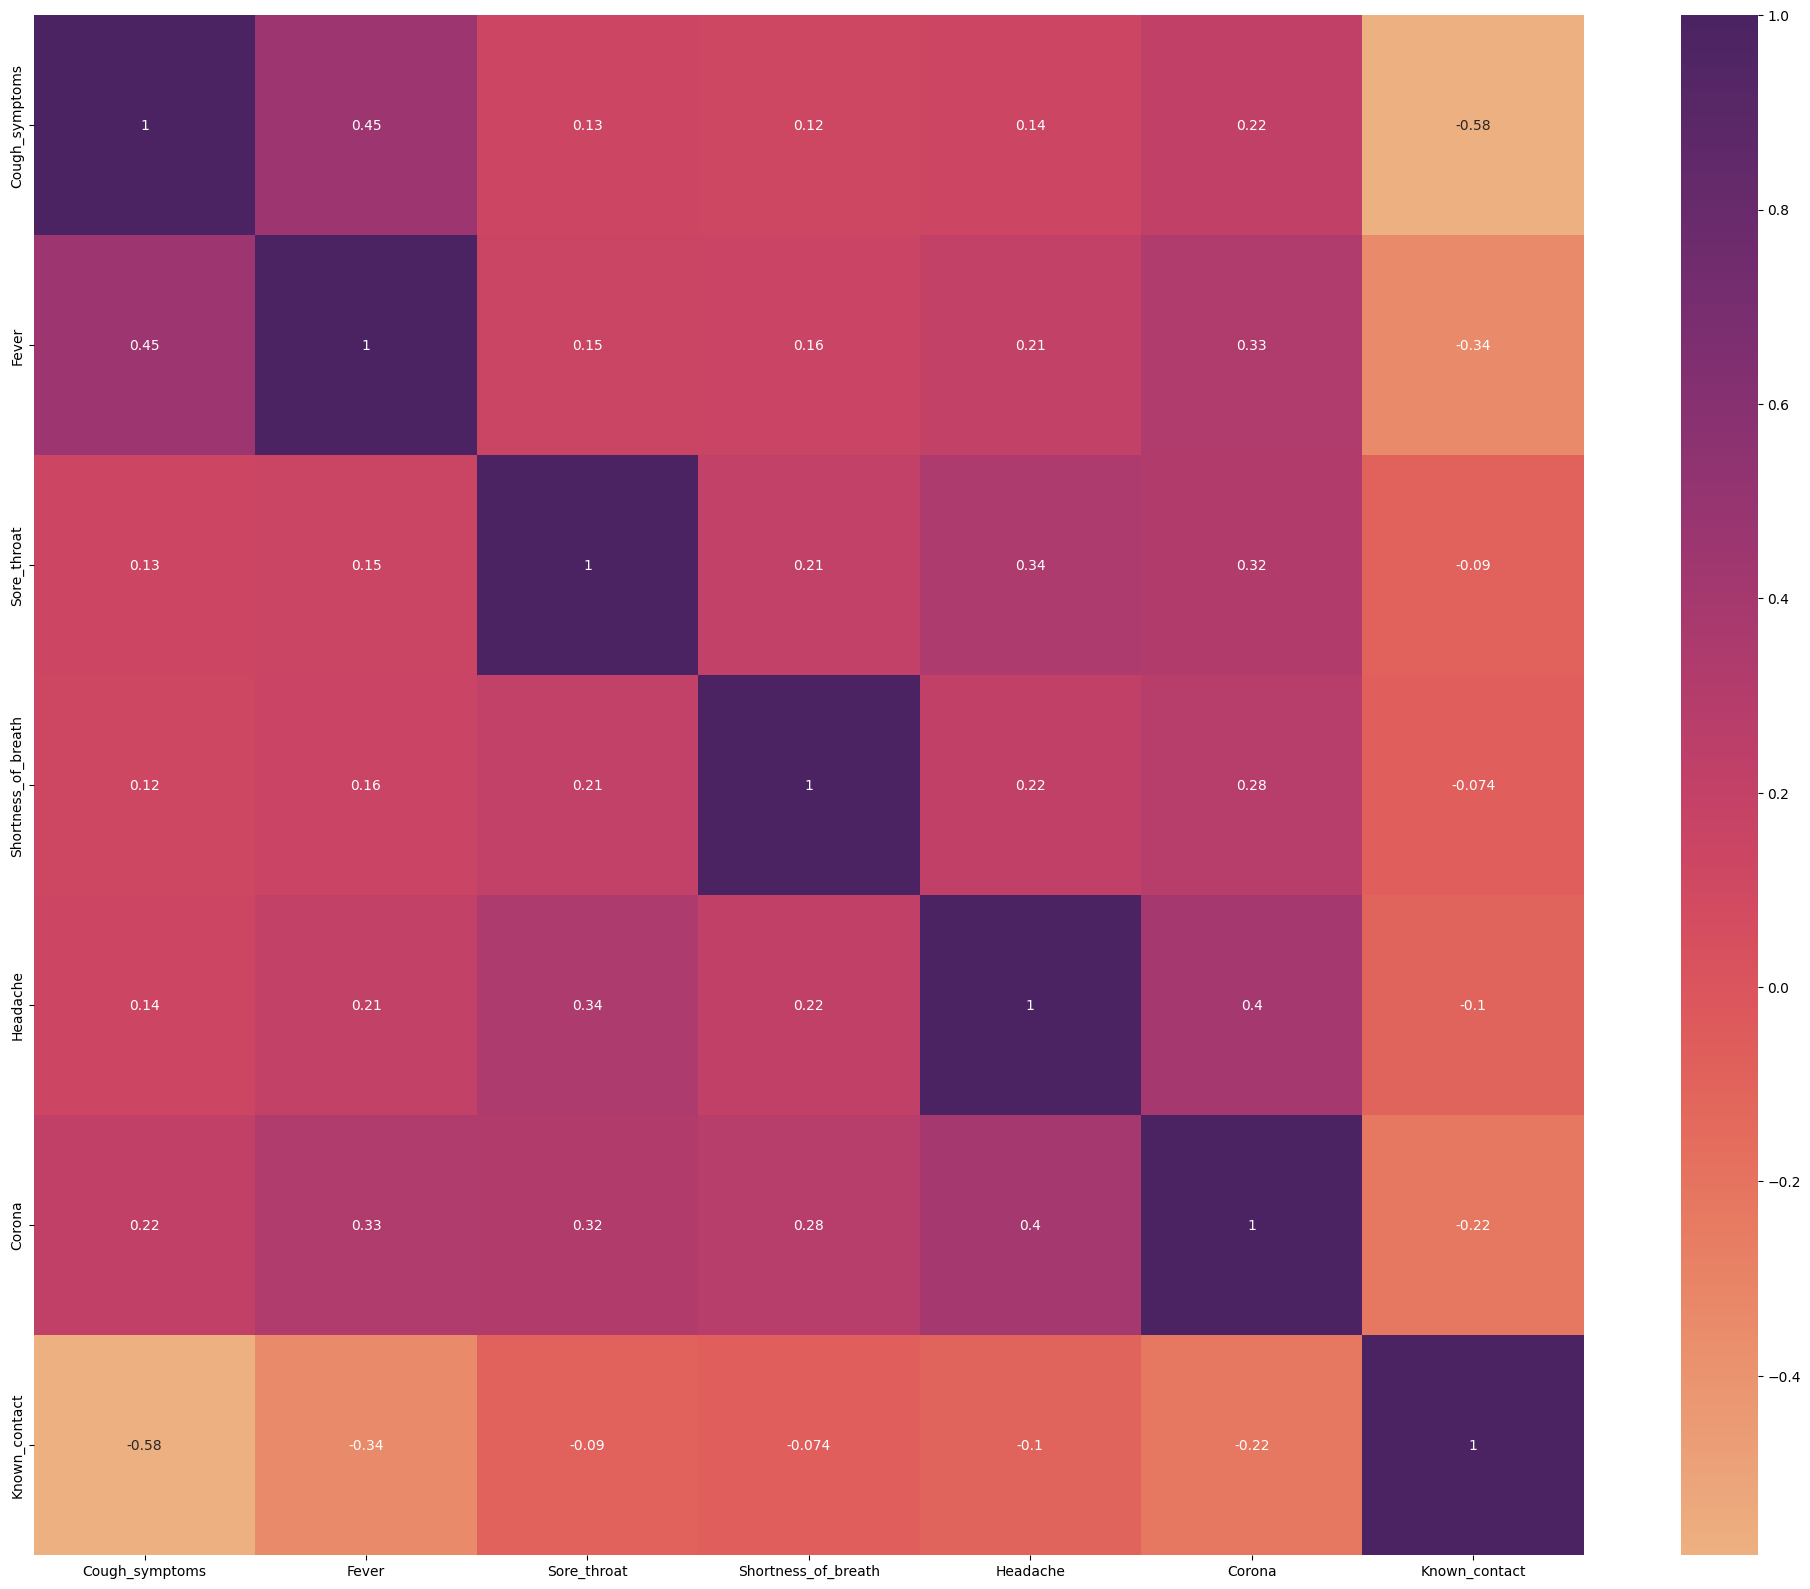

In [73]:
plt.figure(figsize=(25,20))  # Heat map to find correlation between features
sns.heatmap(df_train_val.corr(), annot=True, cmap="flare")

## Machine Learning Approach (Model Training)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
#split the data into features(x) and target variable(y)
X = df_train_val.drop('Corona',axis=1)
y= df_train_val['Corona']

In [76]:
# split the date into training and validation sets:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
#Print the shapes of the split sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (121023, 6)
X_test shape: (30256, 6)
y_train shape: (121023,)
y_test shape: (30256,)


# Model1- Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [78]:
#create a Logistic Regression model
model1 = LogisticRegression(random_state = 0)
#Train the model on the training data
model1.fit(X_train,y_train)
#Make predictions on the validation data
y_pred1 = model1.predict(X_test)
# Calculate the accuracy of the model
accuracy= round(accuracy_score(y_test,y_pred1)*100,2)

print(f"Logistic regression Accuracy Score for the validating  Date: {accuracy}")

Logistic regression Accuracy Score for the validating  Date: 93.14


In [79]:
#split the data into features(x) and target variable(y)
X = df_test.drop('Corona',axis=1)
y= df_test['Corona']
#Make predictions on the test data
y_pred2= model1.predict(X)
#Calculate the accuracy of the model
accuracy = round(accuracy_score(y,y_pred2)*100,2)
print(f"Logistic regression Accuracy Score for the Test Date: {accuracy}")

Logistic regression Accuracy Score for the Test Date: 93.19


**The accuracy we got using Logistic Regression on test data is 93.19%**


In [80]:
#accuracy score
print(accuracy_score(y_test,y_pred1))

#r2 score
print(r2_score(y_test,y_pred1))


0.9313524590163934
0.20295270448428304


**Model2-Decision Tree**

In [81]:
print(X_train.shape)
print(X_test.shape)

(121023, 6)
(30256, 6)


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree model
model2 = DecisionTreeClassifier()
# Train the model on the training data
model2.fit(X_train, y_train)
# Make predictions on the validation data
y_pred = model2.predict(X_test)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f"Decision Tree Accuracy Score for validation Data : {accuracy}")

Decision Tree Accuracy Score for validation Data : 94.46


In [83]:
X = df_test.drop('Corona', axis=1)
y = df_test['Corona']

# Make predictions on the test data
y_pred = model2.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,2)
print(f"Decision Tree Accuracy Score for Test Data : {accuracy}")

Decision Tree Accuracy Score for Test Data : 94.4


# **Model3- Xgboost**


In [84]:
!pip install xgboost

In [85]:
from xgboost import XGBClassifier, plot_tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [86]:
# Make predictions and find accuracy on the validation data
from xgboost import XGBClassifier
from sklearn import metrics
xgb2=XGBClassifier()
xgb2.fit(X_train,y_train)
y_pred1=xgb2.predict(X_test)
accuracyxg =metrics.accuracy_score(y_pred1,y_test)
print(accuracyxg)

0.9446390798519302


In [87]:
# Make predictions and find accuracy on the test data
X = df_test.drop('Corona', axis=1)
y = df_test['Corona']
xgb2=XGBClassifier()
xgb2.fit(X_train,y_train)
y_pred=xgb2.predict(X)
accuracyxg =metrics.accuracy_score(y_pred,y)
print(accuracyxg)

0.9440173454345944


In [88]:
#Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print("RMSE: %f" % (rmse))

RMSE: 0.423793


In [89]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [90]:
#Invoking XGBoost's cv() method and store the results in a cv_results DataFrame
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [91]:
# We have to Extract and print the final boosting round metric.
print((cv_results["test-rmse-mean"]).tail(1))

49    0.431689
Name: test-rmse-mean, dtype: float64


In [92]:
from xgboost import XGBClassifier
from sklearn import metrics
xgb1=XGBClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 50, random_state= 42)
xgb1.fit(X_train,y_train)
ypred=xgb1.predict(X)
accuracyxg =metrics.accuracy_score(ypred,y)
print(accuracyxg)

0.9440173454345944


# **Model4 - Random Forest**

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Create a RandomForestClassifier model:
model3= RandomForestClassifier()
# train the model on the training data
model3.fit(X_train,y_train)
#Make prediction on the validation date
pred2 = model3.predict(X_test)
#Calculate the accuracy of the model:

accuracy = round(accuracy_score(y_test, pred2)*100,2)
print(f'Random Forest Accuracy Score for Validation Data: {accuracy}')

Random Forest Accuracy Score for Validation Data: 94.46


In [94]:
#Metrics Before tuning the data:

print(recall_score(y_test,pred2, average='micro'))
print(precision_score(y_test,pred2, average='micro'))
print(f1_score(y_test,pred2, average='micro'))
print(accuracy_score(y_test,pred2))
print(r2_score(y_test,pred2))
logloss = log_loss(y_test, model3.predict_proba(X_test))
print(round(logloss,2))

0.9446390798519302
0.9446390798519302
0.9446390798519302
0.9446390798519302
0.38495384779431896
0.22


In [95]:
X = df_test.drop('Corona', axis=1)
y = df_test['Corona']

# Make predictions on the test data
y_pred = model3.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,4)
print(f"Random Forest Accuracy Score for Test Data: {accuracy}")

Random Forest Accuracy Score for Test Data: 94.4017


# **Cross validation**

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

In [97]:
?KNeighborsClassifier

In [98]:
Knn = KNeighborsClassifier(n_neighbors = 5, metric= 'euclidean')
Kfold = KFold(n_splits =5)
cv_result = cross_val_score(Knn, X,y,cv = 2)
cv_result
cv_result.mean()
cv_result.min()
cv_result.max()

0.8831290736260394

# **Model Comparison**

In [99]:
new_df=pd.DataFrame({"Models":["log","decisiontree","randomforest","xgboostclassifier"],"accuracies":[ 93.14, 94.46,94.46,94.46]})
new_df

,Models,accuracies
0,log,93.14
1,decisiontree,94.46
2,randomforest,94.46
3,xgboostclassifier,94.46


<Axes: xlabel='Models', ylabel='accuracies'>

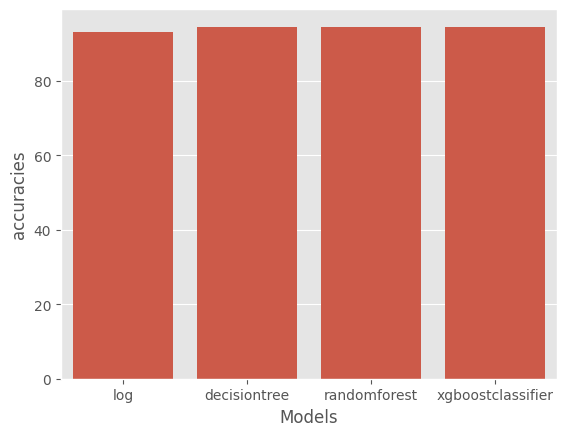

In [100]:
sns.barplot(new_df,x="Models",y="accuracies") # before crossvalidation and hyperparameter tuning